In [1]:
# 로지스틱 회귀(Logistic Regression)

# 이진 분류(Binary Classification) 을 풀기 위한 대표적인 알고리즘
# 분류(Classification) 작업에 사용할 수 있음
# 대표적으로 시그모이드 함수 사용

In [2]:
# 시그모이드 함수(Sigmoid funtion)

# S자 형태로 그래프를 그려주는 시그모이드 함수의 방정식
# H(x) = sigmoid(Wx + b)

In [3]:
# 시그모이드 함수에서 W 과 b 가 주는 영향

#matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

# 넘파이를 사용하여 시그모이드 함수 정의
def sigmoid(x): 
    return 1/(1 + np.exp(-x))

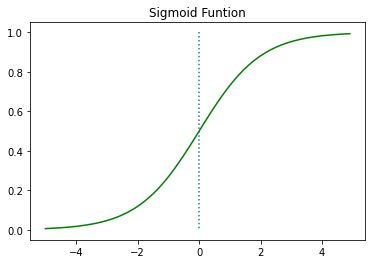

In [4]:
# W 가 1 이고 b 가 0 인 그래프

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Funtion')
plt.show()

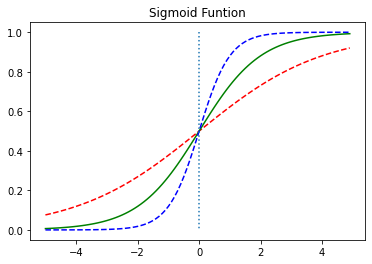

In [5]:
# W 변화에 따른 경사도의 변화

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r', linestyle='--') # W 값이 0.5 일때
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--') # W 값이 2 일 때
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Funtion')
plt.show()

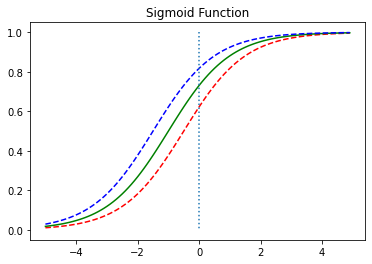

In [7]:
# b 값의 변화에 따른 좌, 우 이동
# b의 값의 따라 그래프가 좌, 우로 이동

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [ ]:
# 시그모이드 함수를 이용한 분류

# 시그모이드 출력값은 1, 0 사이의 값을 가짐 -> 이 특성을 이용하여 분류 작업에 사용할 수 있다.

In [ ]:
# 비용 함수(Cost Funcion)

# 시그모이드 함수는 오차 함수로 로그 함수 사용
# 실제 값이 1 일때 예측 값이 0에 가까워지면 오차가 커져야한다
# 실제 값이 0 일때 예측 값이 1에 가까워지면 오차가 커져야한다

# y = 1 일 때 : cost(H(x), y) = -log(H(x))
# y = 0 일 때 : cost(H(x), y) = -log(1 - H(x))

# 통합한 식
# cost(H(x), y) = -[y * log H(x) + (1 - y) * log (1 - H(x))]

In [8]:
# 파이토치로 로지스틱 회귀 구현하기

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [10]:
# x_train 과 y_train 을 텐서로 선언

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [11]:
# W 와 b 선언
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 X 1
b = torch.zeros(1, requires_grad=True)

In [12]:
# 가설식, 파이토치에서 e^x 를 구현하기 위해 torch.exp(x) 사용

hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [13]:
# 파이토치에서 사용하는 좀 더 간단한 방식

hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [14]:
# 예측값과 실제값 출력
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [16]:
# 하나의 샘플, 즉 하나의 원소에 대해서만 오차를 구하기
-(y_train[0] * torch.log(hypothesis[0]) + (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

In [18]:
# 모든 원소에 대해 오차 구하기
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [19]:
# 전체 오차에 대한 평균
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [20]:
# 파이토치에서 구현
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [21]:
# 모델 훈련

optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs+1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) +  b)
    cost = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost 로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번 마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [23]:
# 훈련 후 W 와 b 를 가지고 예측값 출력
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [24]:
# 위 값들은 0 과 1 사이 값을 가진다. 0.5를 넘으면 True, 넘지 않으면 False로 값을 정하여 출력
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [25]:
# 훈련 후 W 와 b 값 출력
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)
